In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import sklearn

# 1. Display an image using matplotlib (or another tool)
You will most likely need to reshape your data like this to put into your model

In [71]:
data = pd.read_csv("finalTrain.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,146,179,143,0,0,2,0,0,0,0
2,2,0,0,0,0,0,0,1,0,0,...,0,0,0,115,174,72,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Convert data to target and image (and reshape)
target = data["label"].to_numpy()
images_raw = data.drop("label", 1).to_numpy()

images = np.empty((images_raw.shape[0], 28, 28))

for i in range(len(image)):
    images[i] = images_raw[i].reshape(28, 28)

images.shape

(60000, 28, 28)

In [77]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(images[i+j], cmap='binary')
        plt.title(target[i+j])
        plt.axis('off')
    plt.show()

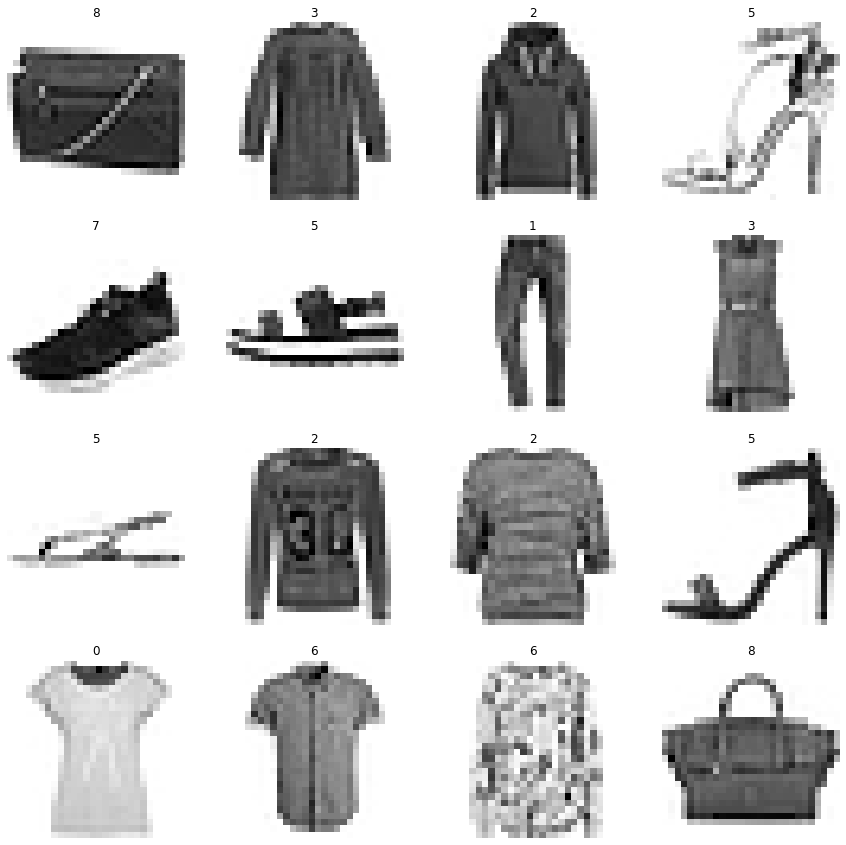

In [78]:
plot_multi(0)

# 2. Divide the finalTrain.csv data set into a training set and a validation set (Willem talked about this in his lecture)

In [139]:
y = target
x = images

In [140]:
x_train = x[:50000]
y_train = y[:50000]
x_test = x[10000:]
y_test = y[10000:]

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [141]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [142]:
# Normalize

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Decide on a build a model architecture

In [143]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model (decide on epochs etc.)

In [144]:
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

# 5. Validate the model to get an idea of accuracy

In [145]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 94.926


# 6. Predict the classes of the finalPredict.csv data